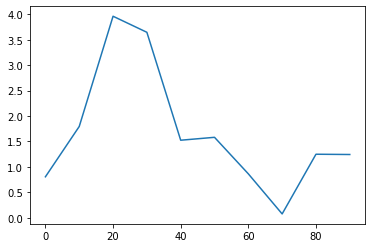

In [1]:
# 9.2 使用pandas和seaborn绘图
import pandas as pd
import numpy as np
# 线型图
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

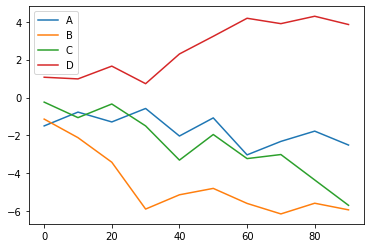

In [2]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
# df.plot()等价于df.plot.line()
df.plot()

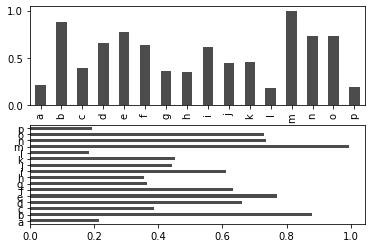

In [3]:
# 柱状图 plot.bar()和plot.barh()
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
# black, transparency
# Series的索引作为 X 轴的刻度
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

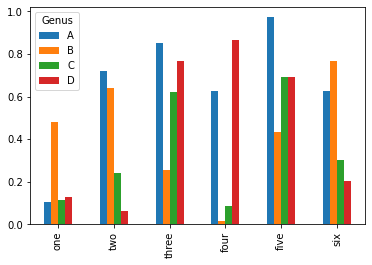

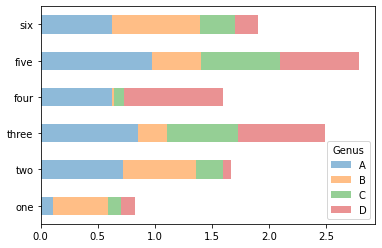

In [4]:
# 对于 DataFrame，柱状图会将每一行的值分为一组
# columns name as legend name
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df.plot.bar()

# 设置stacked=True即可为DataFrame生成堆积柱状图
df.plot.barh(stacked=True, alpha=0.5)

In [5]:
tips = pd.read_csv('examples/tips.csv')
tips
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


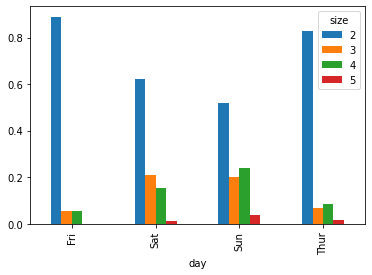

In [6]:
# 规格化，使得各行的和为1，并生成图表
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts
party_pcts.plot.bar()

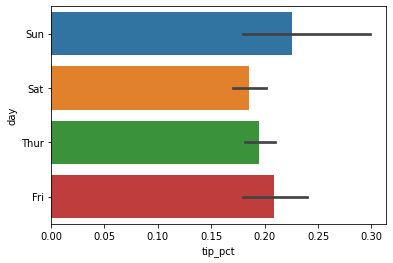

In [7]:
# 用seaborn来看每天的小费比例 https://seaborn.pydata.org/
import seaborn as sns
# percent of tip = tip / (total bill - tip)
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

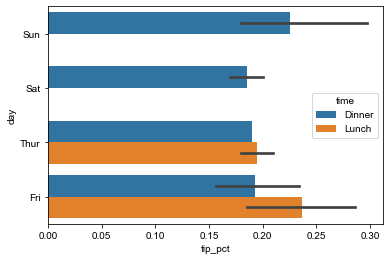

In [8]:
# https://seaborn.pydata.org/generated/seaborn.barplot.html
# hue 按照 time 设置色度
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
# 切换外观
sns.set(style="whitegrid")

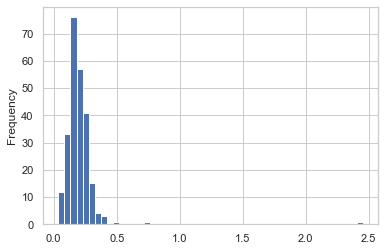

In [9]:
# 直方图和密度图
# “小费占消费总额百分比”的直方图
tips['tip_pct'].plot.hist(bins=50)

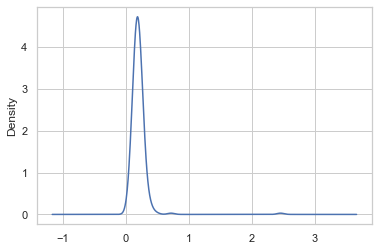

In [10]:
# 密度图
tips['tip_pct'].plot.density()

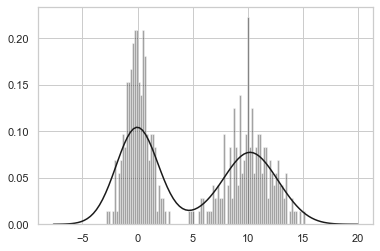

In [11]:
# 双峰分布
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

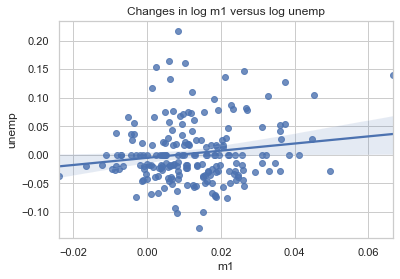

In [12]:
# 散布图或点图
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

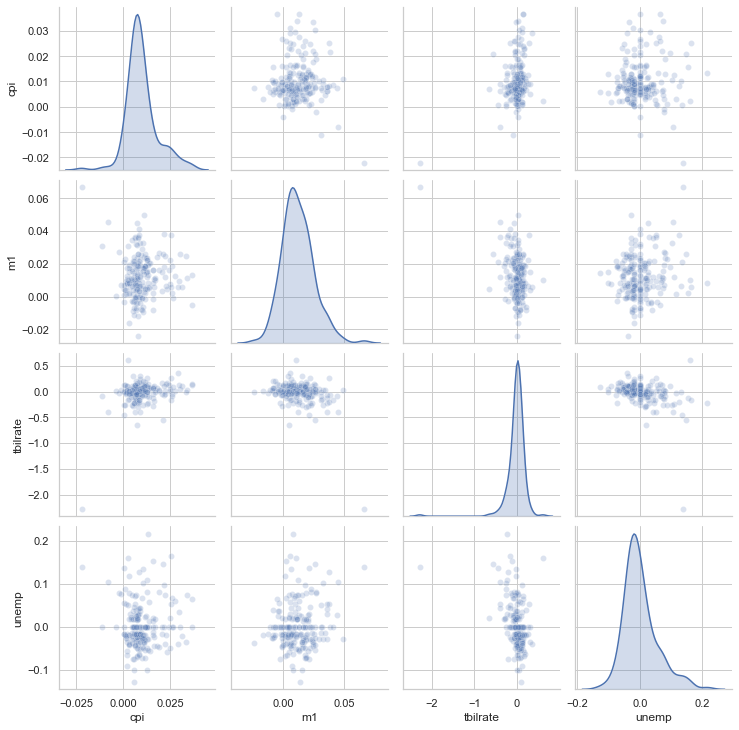

In [13]:
# 散布图矩阵（scatter plot matrix）
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

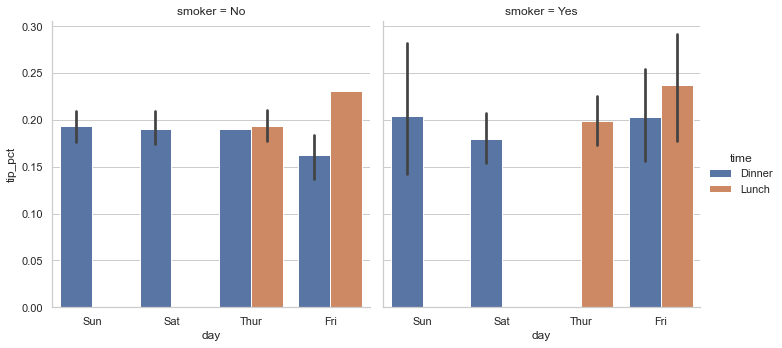

In [14]:
# facet grid
sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

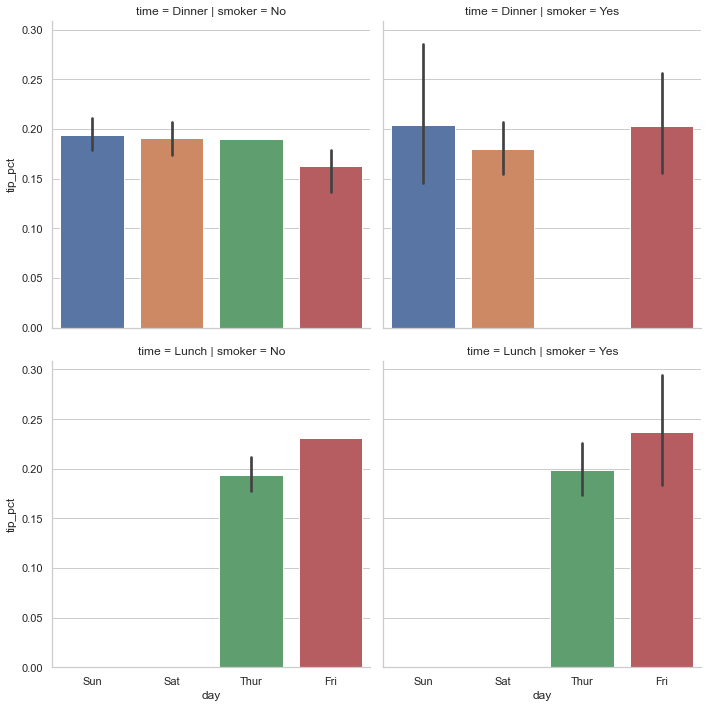

In [15]:
# add row
sns.factorplot(x='day', y='tip_pct', row='time', col='smoker',
               kind='bar', data=tips[tips.tip_pct < 1])

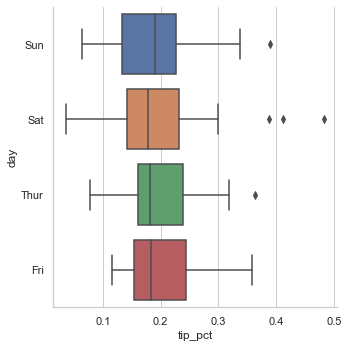

In [16]:
# 盒图（它可以显示中位数，四分位数，和异常值）
sns.factorplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])